# Project 1: SAT & ACT Analysis
Submission by Alexis Lim.

## Executive Summary
### Background

The SAT and ACT are two major standardised tests in the United States and at least one set of scores are often required for college applications. As part of the College Board team, we want to increase participation rates in the SAT by examining state average scores in 2017 and 2018 for the SAT and our major competitor, the ACT test, with the goal of being the standardised test of choice in the U.S.

### Approach

We will be performing exploratory data analysis to identify and examine trends in the data and evaluate the recommended approach to increase participation.

### Problem Statement

What relationships can we identify in state average participation rates and average subject/total scores for the SAT and ACT in 2018? How can we work to increase participation rates in selected states and what are the criteria for the states we should focus on?

### Contents:
- [2017 Data Import and Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Data Dictionary](#Updated-Data-Dictionary)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Data Sources:
- [2017 SAT Scores by State](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [2017 ACT Scores by State](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)
- [2018 SAT Scores by State](https://git.generalassemb.ly/dsi-sg-16/classes/blob/master/Project1234/project_1/data/sat_2018.csv) (Provided by General Assembly)
- [2018 ACT Scores by State](https://git.generalassemb.ly/dsi-sg-16/classes/blob/master/Project1234/project_1/data/act_2018_updated.csv) (Provided by General Assembly)

In [2]:
#Import libraries:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")

## 2017 Data Import and Cleaning

First, let's read in and take a look at our data.

In [3]:
#Read in CSV files to dataframes.
sat_scores_2017 = pd.read_csv("../data/sat_2017.csv")
act_scores_2017 = pd.read_csv("../data/act_2017.csv")

In [4]:
#Print the 1st 10 rows of SAT dataframe.
sat_scores_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
#Print the 1st 10 rows of ACT dataframe.
act_scores_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


Both datasets showcase each state's average scores for components and totals of the ACT and SAT tests. For the SAT, this includes Evidence-Based Reading & Writing and Math while for the ACT it includes English, Reading, Math and Science. The ACT dataset includes the national average scores while the SAT dataset does not.

In [6]:
#Run the describe method on the dataframe to get an overview of our data.
act_scores_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [7]:
sat_scores_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


Based on the summary statistics, there appear to be outlying values. The ACT science scores contain a low score of 2.3 that is extremely different to the minimum values in the other subjects and is very far from the mean of 21.0, while the SAT math scores contain a value of 52 which lies outside of the minimum possible value for the SAT math component (200).

In [8]:
#Locating the problem values in the dataframes.
sat_scores_2017.loc[sat_scores_2017["Math"] < 200,:]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [9]:
act_scores_2017.loc[act_scores_2017["Science"] < 10,:]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


From the above, we can see that the two outlying minimum values are for the state of Maryland.

In [10]:
#Display the Maryland row in the SAT dataset.
sat_scores_2017.loc[sat_scores_2017["State"] == "Maryland",:]  

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [11]:
#From the SAT source link, the Maryland average SAT math score is 524 which we assign to the cell directly.
sat_scores_2017.loc[sat_scores_2017["State"] == "Maryland","Math"] = 524

In [12]:
#Double check that the value has been changed.
sat_scores_2017.loc[sat_scores_2017["State"] == "Maryland",:]  

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [13]:
#Display the Maryland row in the ACT dataset.
act_scores_2017.loc[act_scores_2017["State"] == "Maryland",:]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [14]:
#From the ACT source link, the Maryland average ACT science score is 23.2 which we assign to the cell directly.
act_scores_2017.loc[act_scores_2017["State"] == "Maryland","Science"] = 23.2

In [15]:
#Double check that the value has been changed.
act_scores_2017.loc[act_scores_2017["State"] == "Maryland",:]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


In [16]:
#Call another describe on the datasets to check for any other outlying values.
act_scores_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308
std,2.332132,1.963602,2.048672,1.723351
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


In [17]:
sat_scores_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


We will take a closer look at the the data types of each feature. 

In [18]:
#Display data types for SAT 2017 dataset.
sat_scores_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [18]:
#Display data types for ACT 2017 dataset.
act_scores_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

Based on the above, the participation rates should be numerical values but have been read as strings due to the percentage sign, whilst the composite scores for the ACT dataset have been read as strings instead of floats.

We will define a function that converts participation rates to an appropriate numeric type.

In [19]:
#Define function to: 1) remove % signs if value is a string and 2) convert to float type for the new values and integer values.
def remove_pct(x):
    if type(x) == str:
        new = x.replace("%","")
        new = float(new)/100
        return new
    elif type(x) == int or type(x) == float:
        new = float(x)/100
        return new

In [20]:
#Reassign values in ACT dataset's "Participation" column to float values.
act_scores_2017["Participation"] = act_scores_2017["Participation"].map(remove_pct) 

In [21]:
#Display ACT dataset to check.
act_scores_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [22]:
#Reassign values in SAT dataset's "Participation" column to float values.
sat_scores_2017["Participation"] = sat_scores_2017["Participation"].map(remove_pct) 

In [23]:
#Display SAT dataset to check.
sat_scores_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


There is a value in the ACT dataset's composite column that is affecting the dtype of the column. We will define a function that will map any values that cannot be converted to float as True.

In [24]:
def find_problem(x):
    try:
        float(x)
        return False
    except:
        return True

In [25]:
#Utilise the function created to locate the row that has the problem value.
act_scores_2017.loc[act_scores_2017["Composite"].apply(find_problem),:]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,1.0,19.4,19.8,20.8,20.6,20.2x


There is an extra x in the Wyoming row that is preventing our data being read as float. Hence, we need to manually reassign this.

In [26]:
#Reassign the value to remove the letter.
act_scores_2017.loc[act_scores_2017["State"] == "Wyoming","Composite"] = 20.2

In [27]:
#Convert all values in the Composite column to float values.
act_scores_2017["Composite"] = act_scores_2017["Composite"].apply(lambda x: float(x))

In [28]:
#Display dtypes for ACT dataset.
act_scores_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [29]:
#Display dtypes for SAT dataset.
sat_scores_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

All of our datatypes are now accurate. Now, we will rename our columns for easier processing.

In [30]:
#Display current column names for SAT dataset.
sat_scores_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [42]:
#Display current column names for ACT dataset.
act_scores_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [38]:
def rename_cols(df, prefix):
    new_cols = []
    for col in df.columns:
        if col == 'State':
            new_cols.append(col.lower())
        elif col == "Evidence-Based Reading and Writing":
            new = prefix + "_" + "readingwriting"
            new_cols.append(new)
        else:
            new = prefix + "_" + col.lower()
            new_cols.append(new)
    df.columns = new_cols

In [39]:
#Rename columns in SAT dataset based on existing column names.
rename_cols(sat_scores_2017, "sat17")

In [41]:
sat_scores_2017.head()

,state,sat17_participation,sat17_readingwriting,sat17_math,sat17_total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [43]:
#Rename columns in ACT dataset based on existing column names.
rename_cols(act_scores_2017, "act17")

In [44]:
act_scores_2017.head()

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT & SAT|The U.S. state for which the data applies.|
|sat17_participation|float|SAT 2017|The state's participation rate for the 2017 SAT.|
|sat17_readingwriting|int|SAT 2017|The state's mean score for the Evidence-Based Reading & Writing component of the 2017 SAT.|
|sat17_math|int|SAT 2017|The state's mean score for the Math component of the 2017 SAT.|
|sat17_total|int|SAT 2017|The state's mean total score for the 2017 SAT.|
|act17_participation|float|ACT 2017|The state's participation rate for the 2017 ACT.|
|act17_english|float|ACT 2017|The state's mean score for the English component of the 2017 ACT.|
|act17_math|float|ACT 2017|The state's mean score for the Math component of the 2017 ACT.|
|act17_reading|float|ACT 2017|The state's mean score for the Reading component of the 2017 ACT.|
|act17_science|float|ACT 2017|The state's mean score for the Science component of the 2017 ACT.|
|act17_composite|float|ACT 2017|The state's mean composite score for the 2017 ACT.|

Since we don't need the national average data and we only have it for one of the datasets, let's drop it.

In [45]:
#Check which dataframe has an extra row:
print(f'{len(act_scores_2017)}')
print(f'{len(sat_scores_2017)}')

52
51


In [46]:
#Check through the list of values of "state" column in ACT dataframe to see which state value is not in the SAT dataset.
for state in act_scores_2017['state'].tolist():
    if state not in sat_scores_2017['state'].tolist():
        print(state)

National


In [47]:
#Check the index value of the row for "National".
act_scores_2017.loc[act_scores_2017['state']=='National',:]

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,National,0.6,20.3,20.7,21.4,21.0,21.0


In [48]:
#Drop "National" row for ACT dataset in place.
act_scores_2017.drop([0],inplace=True)

In [49]:
#Check to see if national row has been dropped.
act_scores_2017.head()

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


We join the 2017 ACT and SAT dataframes using the state in each dataframe as the key.

In [50]:
#Join on state column.
combined_2017 = pd.merge(sat_scores_2017,act_scores_2017,how="left",on="state")

In [51]:
combined_2017.head()

,state,sat17_participation,sat17_readingwriting,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [42]:
#Save data out to csv file.
combined_2017.to_csv("../data/combined_2017.csv",index=False,header=True)

## 2018 Data Import and Cleaning

We will read in our 2018 datasets.

In [52]:
#Import 2018 datasets into dataframes.
sat_scores_2018 = pd.read_csv("../data/sat_2018.csv")
act_scores_2018 = pd.read_csv("../data/act_2018_updated.csv")

In [53]:
#Display first ten rows and describe data of datasets.
sat_scores_2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [54]:
act_scores_2018.head(10)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


In [55]:
sat_scores_2017.describe()

,sat17_participation,sat17_readingwriting,sat17_math,sat17_total
count,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039
std,0.352766,45.666901,47.121395,92.494812
min,0.020000,482.000000,468.000000,950.000000
25%,0.040000,533.500000,523.500000,1055.500000
50%,0.380000,559.000000,548.000000,1107.000000
75%,0.660000,613.000000,599.000000,1212.000000
max,1.000000,644.000000,651.000000,1295.000000


In [56]:
act_scores_2018.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [57]:
#Display original column names for the SAT 2018 dataset.
sat_scores_2018.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [58]:
#Display original column names for the ACT 2018 dataset.
act_scores_2018.columns

Index(['State', 'Percentage of Students Tested', 'Average Composite Score',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score'],
      dtype='object')

In [59]:
#Rename the SAT 2018 columns.
rename_cols(sat_scores_2018, "sat18")

In [60]:
#Rename the ACT 2018 columns.
act_scores_2018.rename(columns={
    'State':'state', 
    'Percentage of Students Tested': 'act18_participation', 
    'Average Composite Score': 'act18_composite',
    'Average English Score': 'act18_english', 
    'Average Math Score':'act18_math', 
    'Average Reading Score':'act18_reading',
    'Average Science Score': 'act18_science'
},inplace=True)

In [61]:
#Display datatypes for SAT 2018 data.
sat_scores_2018.dtypes

state                   object
sat18_participation     object
sat18_readingwriting     int64
sat18_math               int64
sat18_total              int64
dtype: object

In [62]:
#Map to convert participation column in SAT 2018 data from object to float.
sat_scores_2018["sat18_participation"] = sat_scores_2018["sat18_participation"].map(remove_pct)

In [63]:
#Double check SAT 2018 datatypes to confirm change.
sat_scores_2018.dtypes

state                    object
sat18_participation     float64
sat18_readingwriting      int64
sat18_math                int64
sat18_total               int64
dtype: object

In [64]:
#Display datatypes for ACT 2018 data.
act_scores_2018.dtypes

state                   object
act18_participation      int64
act18_composite        float64
act18_english          float64
act18_math             float64
act18_reading          float64
act18_science          float64
dtype: object

In [65]:
#Map to convert participation column in ACT 2018 data from int to float.
act_scores_2018["act18_participation"] = act_scores_2018["act18_participation"].map(remove_pct) 

In [66]:
#Double check ACT 2018 datatypes.
act_scores_2018.dtypes

state                   object
act18_participation    float64
act18_composite        float64
act18_english          float64
act18_math             float64
act18_reading          float64
act18_science          float64
dtype: object

In [67]:
#Merge SAT and ACT 2018 data sets
combined_2018 = pd.merge(sat_scores_2018,act_scores_2018,how="left",on="state")

In [68]:
#Print first 5 rows of combined_2018 dataset to check.
combined_2018.head()

,state,sat18_participation,sat18_readingwriting,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
0,Alabama,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


In [69]:
#Save data out to csv file.
combined_2018.to_csv("../data/combined_2018.csv",index=False,header=True)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [61]:
#Merge 2017 and 2018 datasets.
final = pd.merge(combined_2017,combined_2018,how="left",on="state")

In [62]:
#Print first 10 rows of final and describe data to check.
final.head(10)

,state,sat17_participation,sat17_readingwriting,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,...,sat18_participation,sat18_readingwriting,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,...,1.00,519,506,1025,0.30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,...,1.00,535,519,1053,0.26,25.6,26.0,24.8,26.1,24.9
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,1.00,505,492,998,0.17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,...,0.92,497,480,977,0.32,23.6,23.7,22.7,24.4,23.0
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,...,0.56,550,549,1099,0.66,19.9,19.2,19.3,21.1,19.5


In [63]:
final.describe()

,sat17_participation,sat17_readingwriting,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation,sat18_readingwriting,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.457451,563.686275,556.235294,1120.019608,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.373143,47.502627,47.772623,94.155083,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [64]:
print(final.columns)

Index(['state', 'sat17_participation', 'sat17_readingwriting', 'sat17_math',
       'sat17_total', 'act17_participation', 'act17_english', 'act17_math',
       'act17_reading', 'act17_science', 'act17_composite',
       'sat18_participation', 'sat18_readingwriting', 'sat18_math',
       'sat18_total', 'act18_participation', 'act18_composite',
       'act18_english', 'act18_math', 'act18_reading', 'act18_science'],
      dtype='object')


In [65]:
#Save data to csv.
final.to_csv("../data/final.csv",index=False,header=True)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [66]:
#Transpose final.describe
(final.describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
sat17_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat17_readingwriting,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat17_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat17_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act17_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act17_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act17_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act17_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act17_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act17_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [67]:
#Define function for standard deviation based on population of values.
def standard_deviation(all_values):
    mean = sum(all_values)/len(all_values)
    n = len(all_values)
    total = 0
    for x in all_values:
        total += (x-mean)**2
    result = (total/n)**0.5
    return result

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [68]:
#Assign to variable sd a dictionary comprehension that iterates across all numerical columns in the final dataset to calculate standard deviation per the function.
sd = {i: round(standard_deviation(final[i]),2) for i in final.columns.tolist() if final[i].dtype != object}
#Return sd to check the values.
sd

{'sat17_participation': 0.35,
 'sat17_readingwriting': 45.22,
 'sat17_math': 46.66,
 'sat17_total': 91.58,
 'act17_participation': 0.32,
 'act17_english': 2.33,
 'act17_math': 1.96,
 'act17_reading': 2.05,
 'act17_science': 1.72,
 'act17_composite': 2.0,
 'sat18_participation': 0.37,
 'sat18_readingwriting': 47.03,
 'sat18_math': 47.3,
 'sat18_total': 93.23,
 'act18_participation': 0.34,
 'act18_composite': 2.09,
 'act18_english': 2.42,
 'act18_math': 2.02,
 'act18_reading': 2.15,
 'act18_science': 1.85}

In [69]:
#Assign to variable sd_numpy a dictionary comprehension that iterates across all numerical columns in the final dataset to calculate numpy's standard deviation for the values.
sd_numpy = {i: round(np.std(final[i]),2) for i in final.columns.tolist() if final[i].dtype != object}
#Returns sd_numpy to check values.
sd_numpy

{'sat17_participation': 0.35,
 'sat17_readingwriting': 45.22,
 'sat17_math': 46.66,
 'sat17_total': 91.58,
 'act17_participation': 0.32,
 'act17_english': 2.33,
 'act17_math': 1.96,
 'act17_reading': 2.05,
 'act17_science': 1.72,
 'act17_composite': 2.0,
 'sat18_participation': 0.37,
 'sat18_readingwriting': 47.03,
 'sat18_math': 47.3,
 'sat18_total': 93.23,
 'act18_participation': 0.34,
 'act18_composite': 2.09,
 'act18_english': 2.42,
 'act18_math': 2.02,
 'act18_reading': 2.15,
 'act18_science': 1.85}

In [70]:
#Assign to variable sd_describe the results of our describe function with the to_dict method.
sd_describe = round(final.describe().transpose()['std'],2).to_dict()
#Return the variable to check
sd_describe

{'sat17_participation': 0.35,
 'sat17_readingwriting': 45.67,
 'sat17_math': 47.12,
 'sat17_total': 92.49,
 'act17_participation': 0.32,
 'act17_english': 2.35,
 'act17_math': 1.98,
 'act17_reading': 2.07,
 'act17_science': 1.74,
 'act17_composite': 2.02,
 'sat18_participation': 0.37,
 'sat18_readingwriting': 47.5,
 'sat18_math': 47.77,
 'sat18_total': 94.16,
 'act18_participation': 0.34,
 'act18_composite': 2.11,
 'act18_english': 2.45,
 'act18_math': 2.04,
 'act18_reading': 2.17,
 'act18_science': 1.87}

In [71]:
#Define function to iterate through two dictionaries and check if values are not the same.
def check_dict_values(dict1,dict2):
    check = []
    for k,v in dict1.items():
        if dict1[k] != dict2[k]:
            check.append(1)

    print(len(check))

In [72]:
#Check values in sd and sd_numpy.
check_dict_values(sd,sd_numpy)

0


In [73]:
#Check values in sd and sd_describe.
check_dict_values(sd,sd_describe)

16


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: The standard deviations calculated manually and via numpy's `std` method are the same as each other, but they do not match up with the output from pandas `describe` method as the standard deviation calculated by pandas includes the use of an unbiased estimator (n-1) as the denominator.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### Participation Rates in ACT and SAT

In [74]:
#Run describe method on participation rate columns to get a sense of the data.
final.describe()[['sat17_participation','sat18_participation','act17_participation','act18_participation']]

,sat17_participation,sat18_participation,act17_participation,act18_participation
count,51.000000,51.000000,51.000000,51.000000
mean,0.398039,0.457451,0.652549,0.616471
std,0.352766,0.373143,0.321408,0.340810
min,0.020000,0.020000,0.080000,0.070000
25%,0.040000,0.045000,0.310000,0.285000
50%,0.380000,0.520000,0.690000,0.660000
75%,0.660000,0.775000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [75]:
print(f'States by Highest SAT 2017 Participation Rates')

final.sort_values(by="sat17_participation",ascending=False)[['state','sat17_participation']].head(10)

States by Highest SAT 2017 Participation Rates


,state,sat17_participation
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96
19,Maine,0.95
12,Idaho,0.93
9,Florida,0.83
21,Massachusetts,0.76
39,Rhode Island,0.71


In [76]:
print(f'States by Lowest SAT 2017 Participation Rates')

final.sort_values(by="sat17_participation",ascending=True)[['state','sat17_participation']].head(10)

States by Lowest SAT 2017 Participation Rates


,state,sat17_participation
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
23,Minnesota,0.03
50,Wyoming,0.03


In [77]:
#The code block below looks at the participation rates for the SAT 2017 test and prints the states with the highest and lowest values, as well as states with rates higher than 90% and lower than 10%.

highest = final['sat17_participation'].max()
lowest = final['sat17_participation'].min()
highest_states = final[final['sat17_participation'] == highest]['state']
lowest_states = final[final['sat17_participation'] == lowest]['state']

print(f"For the 2017 SAT test, the highest and lowest participation rates are {round(highest*100)}% and {round(lowest*100)}% respectively.")
print()
print(f"There are {len(highest_states)} states with the highest participation rate and they are: {', '.join(highest_states)}.")
print()
print(f"There are {len(lowest_states)} states with the lowest participation rate and they are: {', '.join(lowest_states)}.")
print()

higher_than_ninety = final[final['sat17_participation'] > 0.9]['state']
lower_than_ten = final[final['sat17_participation'] < 0.1]['state']

print(f"There are {len(higher_than_ninety)} states with participation rates higher than 90% in the 2017 SAT test and they are: {', '.join(higher_than_ninety)}.")
print()
print(f"There are {len(lower_than_ten)} states with participation rates lower than 10% in the 2017 SAT test and they are: {', '.join(lower_than_ten)}.")


For the 2017 SAT test, the highest and lowest participation rates are 100% and 2% respectively.

There are 4 states with the highest participation rate and they are: Connecticut, Delaware, District of Columbia, Michigan.

There are 3 states with the lowest participation rate and they are: Iowa, Mississippi, North Dakota.

There are 7 states with participation rates higher than 90% in the 2017 SAT test and they are: Connecticut, Delaware, District of Columbia, Idaho, Maine, Michigan, New Hampshire.

There are 18 states with participation rates lower than 10% in the 2017 SAT test and they are: Alabama, Arkansas, Illinois, Iowa, Kansas, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Nebraska, North Dakota, Oklahoma, South Dakota, Tennessee, Utah, Wisconsin, Wyoming.


In [78]:
print(f'States by Highest ACT 2017 Participation Rates')

final.sort_values(by="act17_participation",ascending=False)[['state','act17_participation']].head(10)

States by Highest ACT 2017 Participation Rates


,state,act17_participation
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0
40,South Carolina,1.0
36,Oklahoma,1.0
33,North Carolina,1.0
28,Nevada,1.0
26,Montana,1.0


In [79]:
print(f'States by Lowest ACT 2017 Participation Rates')

final.sort_values(by="act17_participation",ascending=True)[['state','act17_participation']].head(10)

States by Lowest ACT 2017 Participation Rates


,state,act17_participation
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23
20,Maryland,0.28
45,Vermont,0.29
21,Massachusetts,0.29
22,Michigan,0.29
46,Virginia,0.29


In [80]:
highest = final['act17_participation'].max()
lowest = final['act17_participation'].min()
highest_states = final[final['act17_participation'] == highest]['state']
lowest_states = final[final['act17_participation'] == lowest]['state']

print(f"For the 2017 ACT test, the highest and lowest participation rates are {round(highest*100)}% and {round(lowest*100)}% respectively.")
print()
print(f"There are {len(highest_states)} states with the highest participation rate and they are: {', '.join(highest_states)}.")
print()
print(f"There is {len(lowest_states)} state with the lowest participation rate and it is: {', '.join(lowest_states)}.")
print()

higher_than_ninety = final[final['act17_participation'] > 0.9]['state']
lower_than_ten = final[final['act17_participation'] < 0.1]['state']

print(f"There are {len(higher_than_ninety)} states with participation rates higher than 90% in the 2017 ACT test and they are: {', '.join(higher_than_ninety)}.")
print()
print(f"There is {len(lower_than_ten)} state with a participation rate lower than 10% in the 2017 ACT test and it is: {', '.join(lower_than_ten)}.")


For the 2017 ACT test, the highest and lowest participation rates are 100% and 8% respectively.

There are 17 states with the highest participation rate and they are: Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming.

There is 1 state with the lowest participation rate and it is: Maine.

There are 19 states with participation rates higher than 90% in the 2017 ACT test and they are: Alabama, Arkansas, Colorado, Illinois, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, North Dakota, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming.

There is 1 state with a participation rate lower than 10% in the 2017 ACT test and it is: Maine.


*2017 Participation Rates*

While both tests have states with 100% participation rates in 2017, there are significantly more states with a 100% participation rate for the ACT compared to the SAT (17 versus 4). 

Additionally, there are significantly more states with participation rates higher than 90% for the ACT test compared to the SAT test (19 versus 7) and fewer states with a participation rate of less than 10% for the ACT compared to the SAT (1 versus 18).

In [81]:
print(f'States by Highest SAT 2018 Participation Rates')

final.sort_values(by="sat18_participation",ascending=False)[['state','sat18_participation']].head(10)

States by Highest SAT 2018 Participation Rates


,state,sat18_participation
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
12,Idaho,1.00
19,Maine,0.99
13,Illinois,0.99
39,Rhode Island,0.97
29,New Hampshire,0.96
8,District of Columbia,0.92


In [82]:
print(f'States by Lowest SAT 2018 Participation Rates')

final.sort_values(by="sat18_participation",ascending=True)[['state','sat18_participation']].head(10)

States by Lowest SAT 2018 Participation Rates


,state,sat18_participation
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
24,Mississippi,0.03
15,Iowa,0.03
44,Utah,0.04
23,Minnesota,0.04
18,Louisiana,0.04


In [83]:
#The code below looks at the participation rates for the SAT 2018 test and prints the states with the highest and lowest values, as well as states with rates higher than 90% and lower than 10%.
highest = final['sat18_participation'].max()
lowest = final['sat18_participation'].min()
highest_states = final[final['sat18_participation'] == highest]['state']
lowest_states = final[final['sat18_participation'] == lowest]['state']

print(f"For the 2018 SAT test, the highest and lowest participation rates are {round(highest*100)}% and {round(lowest*100)}% respectively.")
print()
print(f"There are {len(highest_states)} states with the highest participation rate and they are: {', '.join(highest_states)}.")
print()
print(f"There is {len(lowest_states)} state with the lowest participation rate and it is: {', '.join(lowest_states)}.")
print()

higher_than_ninety = final[final['sat18_participation'] > 0.9]['state']
lower_than_ten = final[final['sat18_participation'] < 0.1]['state']

print(f"There are {len(higher_than_ninety)} states with participation rates higher than 90% in the 2018 SAT test and they are: {', '.join(higher_than_ninety)}.")
print()
print(f"There are {len(lower_than_ten)} states with participation rates lower than 10% in the 2018 SAT test and they are: {', '.join(lower_than_ten)}.")


For the 2018 SAT test, the highest and lowest participation rates are 100% and 2% respectively.

There are 5 states with the highest participation rate and they are: Colorado, Connecticut, Delaware, Idaho, Michigan.

There is 1 state with the lowest participation rate and it is: North Dakota.

There are 10 states with participation rates higher than 90% in the 2018 SAT test and they are: Colorado, Connecticut, Delaware, District of Columbia, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island.

There are 17 states with participation rates lower than 10% in the 2018 SAT test and they are: Alabama, Arkansas, Iowa, Kansas, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Nebraska, North Dakota, Oklahoma, South Dakota, Tennessee, Utah, Wisconsin, Wyoming.


In [84]:
print(f'States by Highest ACT 2018 Participation Rates')
final.sort_values(by="act18_participation",ascending=False)[['state','act18_participation']].head(10)

States by Highest ACT 2018 Participation Rates


,state,act18_participation
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0
40,South Carolina,1.0
36,Oklahoma,1.0
35,Ohio,1.0
33,North Carolina,1.0
28,Nevada,1.0


In [85]:
print(f'States by Lowest ACT 2018 Participation Rates')
final.sort_values(by="act18_participation",ascending=True)[['state','act18_participation']].head(10)

States by Lowest ACT 2018 Participation Rates


,state,act18_participation
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20
22,Michigan,0.22
47,Washington,0.24
45,Vermont,0.24
46,Virginia,0.24
21,Massachusetts,0.25


In [86]:
#The code below looks at the participation rates for the ACT 2018 test and prints the states with the highest and lowest values, as well as states with rates higher than 90% and lower than 10%.

highest = final['act18_participation'].max()
lowest = final['act18_participation'].min()
highest_states = final[final['act18_participation'] == highest]['state']
lowest_states = final[final['act18_participation'] == lowest]['state']

print(f"For the 2018 ACT test, the highest and lowest participation rates are {round(highest*100)}% and {round(lowest*100)}% respectively.")
print()
print(f"There are {len(highest_states)} states with the highest participation rate and they are: {', '.join(highest_states)}.")
print()
print(f"There is {len(lowest_states)} state with the lowest participation rate and it is: {', '.join(lowest_states)}.")
print()

higher_than_ninety = final[final['act18_participation'] > 0.9]['state']
lower_than_ten = final[final['act18_participation'] < 0.1]['state']

print(f"There are {len(higher_than_ninety)} states with participation rates higher than 90.% in the 2018 ACT test and they are: {', '.join(higher_than_ninety)}.")
print()
print(f"There is {len(lower_than_ten)} state with a participation rate lower than 10.% in the 2018 ACT test and it is: {', '.join(lower_than_ten)}.")


For the 2018 ACT test, the highest and lowest participation rates are 100% and 7% respectively.

There are 17 states with the highest participation rate and they are: Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming.

There is 1 state with the lowest participation rate and it is: Maine.

There are 19 states with participation rates higher than 90.% in the 2018 ACT test and they are: Alabama, Arkansas, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, North Dakota, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming.

There is 1 state with a participation rate lower than 10.% in the 2018 ACT test and it is: Maine.


*2018 Participation Rates*

Similar to 2017, we see a greater number of states with participation rates of 100% and higher than/equal to 90% for the ACT test compared to the SAT test. It is worthy to note the following:
- Maine remains the only state with a participation rate of less than 10% for the ACT.
- We see a growth in the number of states with participation rates higher than 90% for the SAT.

#### Mean Total & Composite Scores

In [87]:
#The code blocks below look at the highest and lowest SAT & ACT mean scores in 2017.
print(f'States by Highest SAT Mean Scores in 2017')
final.sort_values(by="sat17_total",ascending=False)[['state','sat17_total','sat17_participation']].head(10)

States by Highest SAT Mean Scores in 2017


,state,sat17_total,sat17_participation
23,Minnesota,1295,0.03
49,Wisconsin,1291,0.03
15,Iowa,1275,0.02
25,Missouri,1271,0.03
16,Kansas,1260,0.04
34,North Dakota,1256,0.02
27,Nebraska,1253,0.03
17,Kentucky,1247,0.04
24,Mississippi,1242,0.02
44,Utah,1238,0.03


In [88]:
print(f'States by Lowest SAT Mean Scores in 2017')

final.sort_values(by="sat17_total",ascending=True)[['state','sat17_total','sat17_participation']].head(10)

States by Lowest SAT Mean Scores in 2017


,state,sat17_total,sat17_participation
8,District of Columbia,950,1.00
7,Delaware,996,1.00
12,Idaho,1005,0.93
22,Michigan,1005,1.00
19,Maine,1012,0.95
9,Florida,1017,0.83
43,Texas,1020,0.62
6,Connecticut,1041,1.00
36,Oklahoma,1047,0.07
10,Georgia,1050,0.61


In [89]:
print(f'States by Highest ACT Mean Scores in 2017')
final.sort_values(by="act17_composite",ascending=False)[['state','act17_composite','act17_participation']].head(10)

States by Highest ACT Mean Scores in 2017


,state,act17_composite,act17_participation
29,New Hampshire,25.5,0.18
21,Massachusetts,25.4,0.29
6,Connecticut,25.2,0.31
19,Maine,24.3,0.08
8,District of Columbia,24.2,0.32
32,New York,24.2,0.31
22,Michigan,24.1,0.29
7,Delaware,24.1,0.18
39,Rhode Island,24.0,0.21
30,New Jersey,23.9,0.34


In [90]:
print(f'States by Lowest ACT Mean Scores in 2017')
final.sort_values(by="act17_composite",ascending=True)[['state','act17_composite','act17_participation']].head(10)

States by Lowest ACT Mean Scores in 2017


,state,act17_composite,act17_participation
28,Nevada,17.8,1.00
24,Mississippi,18.6,1.00
40,South Carolina,18.7,1.00
11,Hawaii,19.0,0.90
33,North Carolina,19.1,1.00
0,Alabama,19.2,1.00
3,Arkansas,19.4,1.00
36,Oklahoma,19.4,1.00
18,Louisiana,19.5,1.00
2,Arizona,19.7,0.62


*2017 Mean Scores*

When looking at the highest mean total and composite scores for the two tests in 2017, it is interesting to note that the states with the highest scores tend to have lower participation rates (<10% for SAT and < 35% for ACT) whereas the states with the lowest mean scores tend to have higher participation rates.

An exception to this appears to be Oklahoma which has the 9th lowest mean score despite having a low participation rate of 7%. This suggests that students in the state struggle with the SAT test.

With a higher participation rate, students of all academic levels are more likely to be taking the test compared to states with a lower participation rate where only students that are more confident of scoring well would choose to take the test. Hence, simply looking at top-performing states by mean scores will not be meaningful in gauging the capabilities of students in each state.

In [91]:
#The code blocks below look at the highest and lowest SAT & ACT mean scores in 2018.

print(f'States by Highest SAT Mean Scores in 2018')
final.sort_values(by="sat18_total",ascending=False)[['state','sat17_total','sat17_participation','sat18_total','sat18_participation']].head(10)

States by Highest SAT Mean Scores in 2018


,state,sat17_total,sat17_participation,sat18_total,sat18_participation
23,Minnesota,1295,0.03,1298,0.04
49,Wisconsin,1291,0.03,1294,0.03
34,North Dakota,1256,0.02,1283,0.02
15,Iowa,1275,0.02,1265,0.03
16,Kansas,1260,0.04,1265,0.04
25,Missouri,1271,0.03,1262,0.04
50,Wyoming,1230,0.03,1257,0.03
27,Nebraska,1253,0.03,1252,0.03
17,Kentucky,1247,0.04,1248,0.04
41,South Dakota,1216,0.03,1240,0.03


In [92]:
print(f'States by Lowest SAT Mean Scores in 2018')
final.sort_values(by="sat18_total",ascending=True)[['state','sat17_total','sat17_participation','sat18_total','sat18_participation']].head(10)

States by Lowest SAT Mean Scores in 2018


,state,sat17_total,sat17_participation,sat18_total,sat18_participation
8,District of Columbia,950,1.00,977,0.92
7,Delaware,996,1.00,998,1.00
48,West Virginia,1086,0.14,999,0.28
12,Idaho,1005,0.93,1001,1.00
44,Utah,1238,0.03,1010,0.04
11,Hawaii,1085,0.55,1010,0.56
22,Michigan,1005,1.00,1011,1.00
19,Maine,1012,0.95,1013,0.99
39,Rhode Island,1062,0.71,1018,0.97
13,Illinois,1115,0.09,1019,0.99


In [93]:
print(f'States by Highest ACT Mean Scores in 2018')
final.sort_values(by="act18_composite",ascending=False)[['state','act17_composite','act17_participation','act18_composite','act18_participation']].head(10)

States by Highest ACT Mean Scores in 2018


,state,act17_composite,act17_participation,act18_composite,act18_participation
6,Connecticut,25.2,0.31,25.6,0.26
21,Massachusetts,25.4,0.29,25.5,0.25
29,New Hampshire,25.5,0.18,25.1,0.16
32,New York,24.2,0.31,24.5,0.27
22,Michigan,24.1,0.29,24.4,0.22
39,Rhode Island,24.0,0.21,24.2,0.15
45,Vermont,23.6,0.29,24.1,0.24
19,Maine,24.3,0.08,24.0,0.07
46,Virginia,23.8,0.29,23.9,0.24
5,Colorado,20.8,1.00,23.9,0.30


In [94]:
print(f'States by Lowest ACT Mean Scores in 2018')
final.sort_values(by="act18_composite",ascending=True)[['state','act17_composite','act17_participation','act18_composite','act18_participation']].head(10)

States by Lowest ACT Mean Scores in 2018


,state,act17_composite,act17_participation,act18_composite,act18_participation
28,Nevada,17.8,1.00,17.7,1.00
40,South Carolina,18.7,1.00,18.3,1.00
24,Mississippi,18.6,1.00,18.6,1.00
11,Hawaii,19.0,0.90,18.9,0.89
0,Alabama,19.2,1.00,19.1,1.00
33,North Carolina,19.1,1.00,19.1,1.00
2,Arizona,19.7,0.62,19.2,0.66
18,Louisiana,19.5,1.00,19.2,1.00
36,Oklahoma,19.4,1.00,19.3,1.00
3,Arkansas,19.4,1.00,19.4,1.00


*2018 Mean Scores*

When looking at the highest mean total and composite scores for the two tests in 2018, we see the same trend as in 2017 where the states with the highest scores tend to have lower participation rates and vice versa.

Most of the states with highest and lowest mean scores tended to have similar scores in 2017, although Utah appears to have a significantly lower SAT score in 2018 compared to 2017. Along with West Virginia, its low mean score despite a relatively lower participation rate indicates that students in the state may be struggling with the SAT test format or content.


#### Rate Change in States With 100% Participation

In [95]:
#The code below checks for rows where the SAT 2017 or SAT 2018 participation rate is 100% but were not equal to each other in both years.

print(f'States With 100% Participation for SAT with a Rate Change in 2017 or 2018')
sat_100percent = final.loc[((final['sat17_participation'] == 1) | (final['sat18_participation'] == 1)) & (final['sat17_participation'] != final['sat18_participation']),:][['state','sat17_participation','sat18_participation']].copy()
sat_100percent['rate_of_change'] = (sat_100percent['sat18_participation'] - sat_100percent['sat17_participation']) 
sat_100percent.sort_values(by='rate_of_change',ascending=False)

States With 100% Participation for SAT with a Rate Change in 2017 or 2018


,state,sat17_participation,sat18_participation,rate_of_change
5,Colorado,0.11,1.00,0.89
12,Idaho,0.93,1.00,0.07
8,District of Columbia,1.00,0.92,-0.08


In [96]:
#The code below checks for rows where the ACT 2017 or ACT 2018 participation rate is 100% but were not equal to each other in both years.

print(f'States With 100% Participation for ACT with a Rate Change in 2017 or 2018')
act_100percent = final.loc[((final['act17_participation'] == 1) | (final['act18_participation'] == 1)) & (final['act17_participation'] != final['act18_participation']),:][['state','act17_participation','act18_participation']].copy()
act_100percent['rate_of_change'] = (act_100percent['act18_participation'] - act_100percent['act17_participation']) 
act_100percent.sort_values(by='rate_of_change',ascending=False)

States With 100% Participation for ACT with a Rate Change in 2017 or 2018


,state,act17_participation,act18_participation,rate_of_change
35,Ohio,0.75,1.00,0.25
27,Nebraska,0.84,1.00,0.16
23,Minnesota,1.00,0.99,-0.01
5,Colorado,1.00,0.30,-0.70


For the SAT test, Colorado and Idaho saw an increase of 89 and 7 percentage points respectively in participation rate to 100% in 2018 and the District of Columbia saw a decrease of 8 percentage points in participation rate from 100% in 2017.

For the ACT test, Ohio and Nebraska saw an increase of 25 and 17 percentage points in participation rate to 100% in 2018 whilst Minnesota and Colorado saw a decrease of 1 and 70 percentage points from 100% in 2017.

It is worthy to note that Colorado saw a significant increase in participation rate in the SAT and a significant decrease in participation rate in the ACT.

#### Participation Rate Above 50% in Both Tests

In [97]:
#The code blocks below check for rows where the participation in the ACT and SAT is more than 50% for each year. 
highparticipation_2017 = final.loc[((final['sat17_participation'] > 0.5) & (final['act17_participation'] > 0.5)),:][['state','sat17_participation','act17_participation']].sort_values(by='sat17_participation').copy()
highparticipation_2017['average'] = (highparticipation_2017['sat17_participation'] + highparticipation_2017['act17_participation']) / 2
highparticipation_2017.sort_values(by='average',ascending=False)

,state,sat17_participation,act17_participation,average
9,Florida,0.83,0.73,0.780
11,Hawaii,0.55,0.90,0.725
10,Georgia,0.61,0.55,0.580


In [98]:
highparticipation_2018 = final.loc[((final['sat18_participation'] > 0.5) & (final['act18_participation'] > 0.5)),:][['state','sat17_participation','act17_participation','sat18_participation','act18_participation']].sort_values(by='sat18_participation').copy()
highparticipation_2018['average'] = (highparticipation_2018['sat18_participation'] + highparticipation_2018['act18_participation']) / 2
highparticipation_2018.sort_values(by='average',ascending=False)

,state,sat17_participation,act17_participation,sat18_participation,act18_participation,average
40,South Carolina,0.50,1.00,0.55,1.00,0.775
33,North Carolina,0.49,1.00,0.52,1.00,0.760
11,Hawaii,0.55,0.90,0.56,0.89,0.725
10,Georgia,0.61,0.55,0.70,0.53,0.615
9,Florida,0.83,0.73,0.56,0.66,0.610


In 2017, three states - Florida, Hawaii and Georgia - had participation rates of more than 50% in both tests. Of the three, Florida had a participation rate of more than 70% in both tests, averaging a 78% participation rate across both.

In 2018, five states had participation rates of more than 50% in both tests. This included the same three states as in 2017 but also included South Carolina and North Carolina. For the latter two states, participation rates in the SAT were at 50 or close to 50 and as they grew by a few percentage points, this brought them into the group. In 2018, Florida saw a drop in participation for both tests, which lowered its average participation rate.

## Data Visualization

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [99]:
#Show the correlations between each numerical variable.
final.corr()

,sat17_participation,sat17_readingwriting,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation,sat18_readingwriting,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
sat17_participation,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.653670,0.694748,0.874763,-0.666313,-0.686941,-0.684556,-0.792382,0.639323,0.645332,0.649435,0.651892,0.611675
sat17_readingwriting,-0.874326,1.000000,0.987056,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.422130,-0.470382,-0.818925,0.814096,0.865909,0.849798,0.702481,-0.440915,-0.447026,-0.450128,-0.460779,-0.410872
sat17_math,-0.855091,0.987056,1.000000,0.996822,0.682572,-0.420673,-0.420456,-0.442410,-0.365515,-0.417817,-0.789166,0.800380,0.878982,0.849583,0.667444,-0.388769,-0.403532,-0.384444,-0.414636,-0.355104
sat17_total,-0.867540,0.996661,0.996822,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.394559,-0.445020,-0.806796,0.810068,0.875601,0.852727,0.687107,-0.415762,-0.426210,-0.418011,-0.438811,-0.383698
act17_participation,-0.841234,0.716153,0.682572,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.836595,-0.858134,-0.756479,0.522593,0.555406,0.545179,0.919171,-0.775514,-0.763176,-0.782878,-0.789497,-0.763334
act17_english,0.686889,-0.461345,-0.420673,-0.441947,-0.843501,1.000000,0.967803,0.985999,0.980042,0.990856,0.679643,-0.347978,-0.365787,-0.361303,-0.796637,0.932535,0.937173,0.918868,0.930897,0.922873
act17_math,0.710697,-0.486126,-0.420456,-0.454116,-0.861114,0.967803,1.000000,0.979630,0.986929,0.990451,0.696294,-0.355133,-0.340094,-0.351847,-0.813410,0.933247,0.910684,0.948795,0.924997,0.930087
act17_reading,0.705352,-0.488441,-0.442410,-0.466558,-0.866620,0.985999,0.979630,1.000000,0.988034,0.995069,0.680380,-0.363354,-0.374075,-0.373195,-0.813021,0.929711,0.916256,0.923622,0.937214,0.926420
act17_science,0.653670,-0.422130,-0.365515,-0.394559,-0.836595,0.980042,0.986929,0.988034,1.000000,0.995129,0.647635,-0.320049,-0.315431,-0.321679,-0.784996,0.934586,0.915850,0.936559,0.930810,0.939334
act17_composite,0.694748,-0.470382,-0.417817,-0.445020,-0.858134,0.990856,0.990451,0.995069,0.995129,1.000000,0.683164,-0.351602,-0.354639,-0.357463,-0.808497,0.939271,0.927275,0.938748,0.937604,0.935847


In [100]:
#Create upper triangle mask for the scatterplot.
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

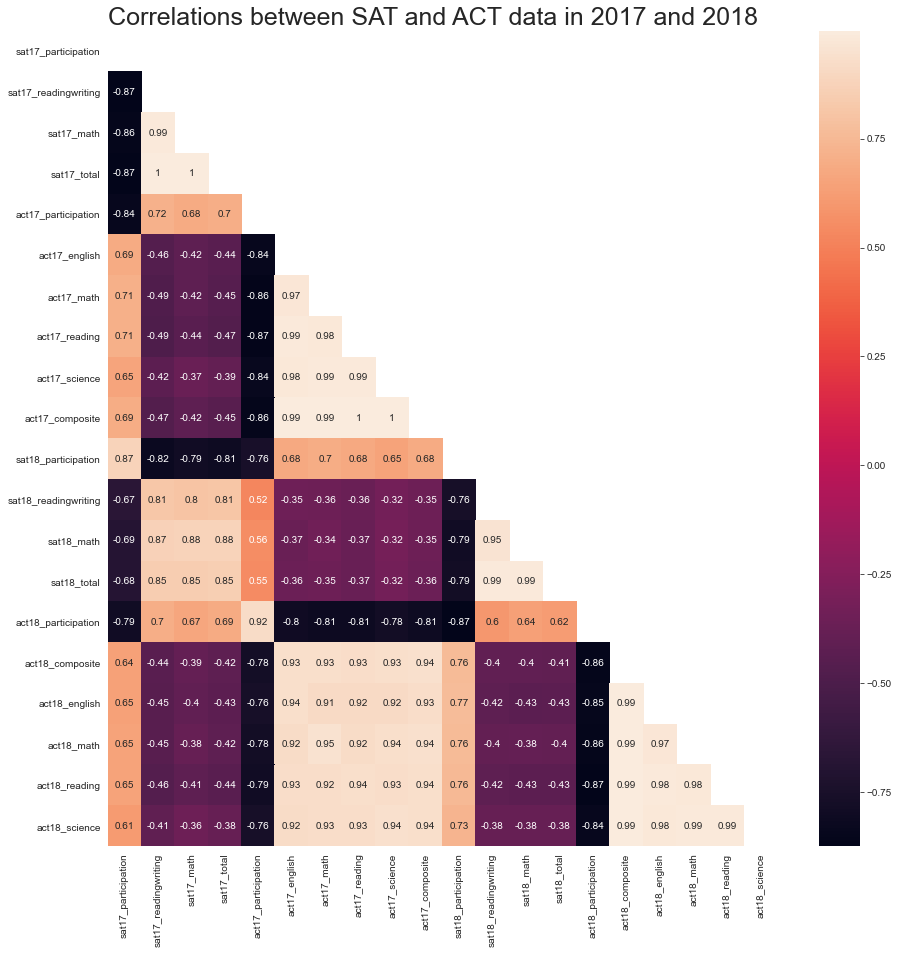

In [101]:
plt.figure(figsize=(15,15))
sns.set_style("whitegrid")
sns.heatmap(final.corr(),mask=mask,annot=True)
plt.title('Correlations between SAT and ACT data in 2017 and 2018',loc='left',fontsize=25);

From the scatterplot above, we can make the following observations:

- ACT scores for each subject and the composite score are strongly positively correlated to each other and year-on-year.
- SAT scores are also strongly positively correlated with each other within each year.
- Participation rates for each test are strongly negatively correlated with participation rates for the other test.
- Participation rates are also strongly negatively correlated with scores for the respective tests i.e. lower SAT participation rate with higher SAT scores.
- The average scores for each subject are strongly positively correlated with subjects from the same test, across years, but scores for the same/similar subjects from different tests (e.g. SAT math and ACT math) are negatively correlated.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [102]:
#Subplot histogram function.
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels,colormap):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(16,8),sharey=True) # You'll want to specify your figsize
    fig.tight_layout(pad=4.5)

    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    cmap = matplotlib.cm.get_cmap(colormap)
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].grid(alpha=0.5)
        ax[i].hist(dataframe[column],bins = 20,color=cmap((i+1)/(len(list_of_columns)+1))) # feel free to add more settings - check colormap
        ax[i].set_title(list_of_titles[i],fontsize=16,pad=12)
        ax[i].set_xlabel(list_of_xlabels[i],fontsize=12,labelpad=8)
        ax[i].axvline(dataframe[column].mean(), color='purple', linestyle='dashed', linewidth=1.5)
        ax[i].axvline(dataframe[column].median(), color='mediumseagreen', linestyle='dashed', linewidth=1.5)
        #Include median and mean lines
    mean = Line2D([0], [0], color='purple', lw=1.5,linestyle='dashed')
    median = Line2D([0], [0], color='mediumseagreen', lw=1.5,linestyle='dashed')
    line_labels = ['mean','median']
    fig.legend(handles=[mean, median],     # The line objects
           labels=line_labels,   #The labels for each line
           loc="lower center",   # Position of legend
           borderaxespad=0.04,    # Small spacing around legend box
           title="Legend",# Title for the legend
           title_fontsize = 14,
           ncol=2
           )
    plt.subplots_adjust(bottom=0.1)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

*Participation Rates in 2017 and 2018 SAT and ACT*

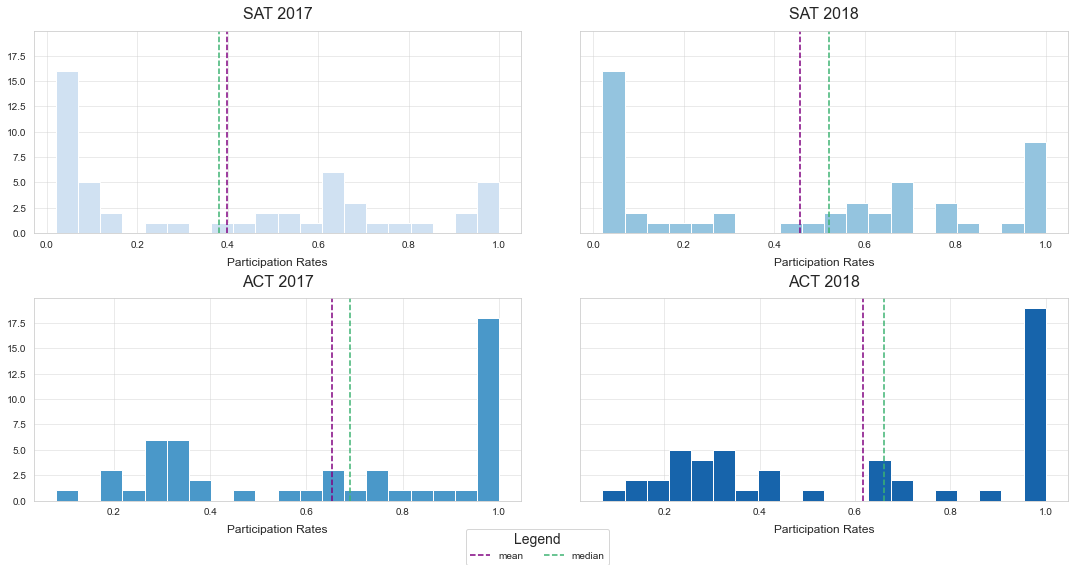

In [103]:
subplot_histograms(final,['sat17_participation','sat18_participation','act17_participation','act18_participation'],['SAT 2017','SAT 2018','ACT 2017','ACT 2018'],['Participation Rates','Participation Rates','Participation Rates','Participation Rates'],'Blues')

We can make the following observations:
- The ACT participation rates are left-skewed while the SAT participation rates are right-skewed.
- The mean and median rates for ACT are higher than those for SAT in both years, although we see an increase in the median participation rate for the SAT in 2018.

We can conclude that the ACT sees higher participation rates from states compared to the SAT, where more states have high participation rates between 90-100%.

*Math Scores in 2017 and 2018 ACT and SAT*

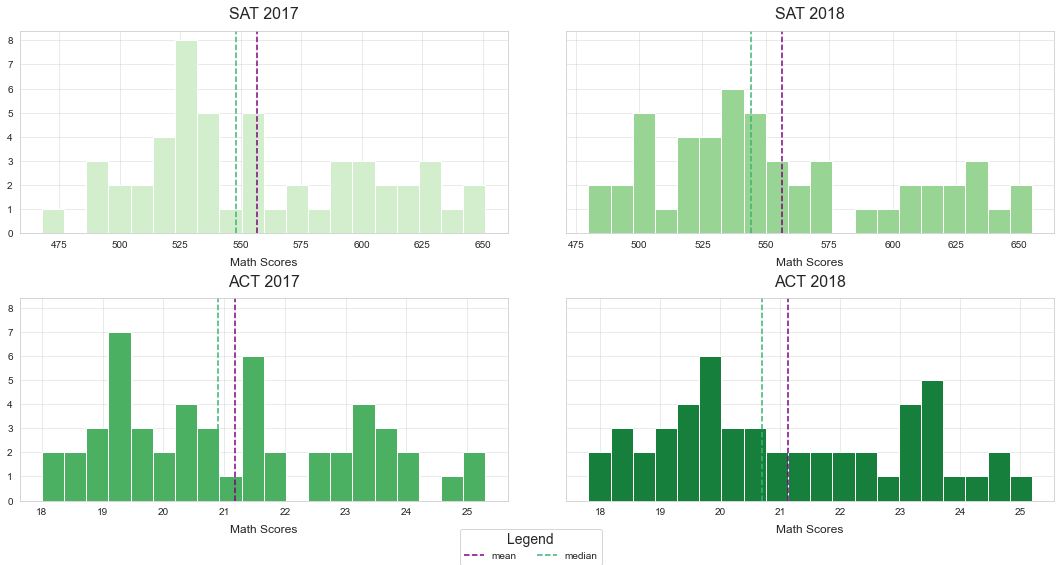

In [104]:
subplot_histograms(final,['sat17_math','sat18_math','act17_math','act18_math'],['SAT 2017','SAT 2018','ACT 2017','ACT 2018'],['Math Scores','Math Scores','Math Scores','Math Scores'],'Greens')

We can make the following observations:
- The shape of the distribution for the math test scores across subjects are similar across both tests and years, with a bimodal distribution. This makes sense as it is unlikely for the overall distribution of scores for states to change from one year to the next. However, as we only have 51 datapoints, the graphs are more likely to vary from one another in the exact values.
- The SAT math mean scores tend to have the most values around 525 - 550 and another peak in values around 580 - 620.
- The ACT math mean scores tend to have the most values around 18 - 20 and another peak in values around 23 - 24.

*Verbal/Reading Scores in 2017 and 2018 SAT and ACT*

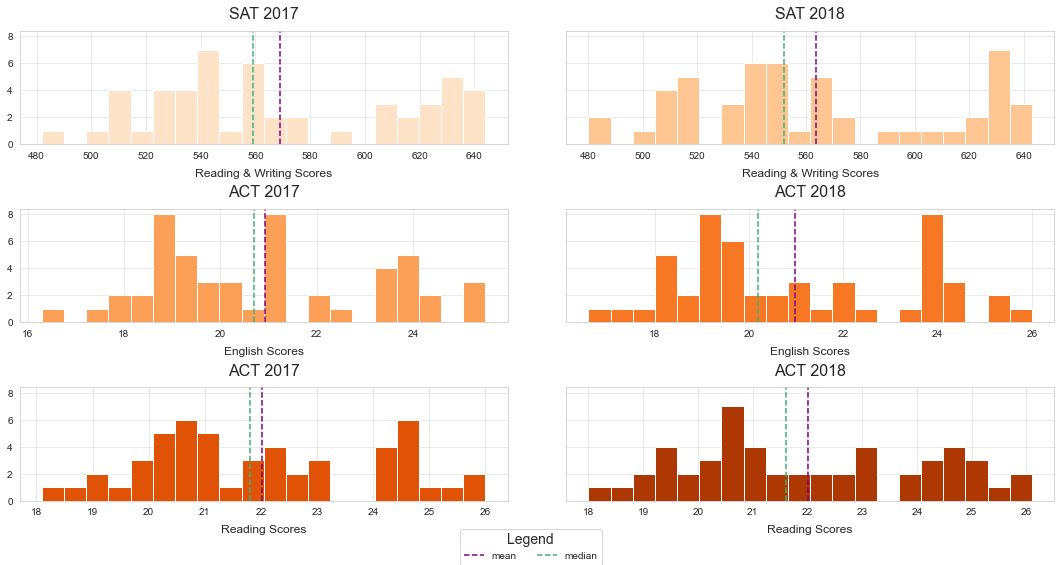

In [105]:
#Reading/verbal
subplot_histograms(final,['sat17_readingwriting','sat18_readingwriting','act17_english','act18_english','act17_reading','act18_reading'],['SAT 2017','SAT 2018','ACT 2017','ACT 2018','ACT 2017','ACT 2018'],['Reading & Writing Scores','Reading & Writing Scores','English Scores','English Scores','Reading Scores','Reading Scores'],'Oranges')

We can make the following observations:
- The distributions for the respective subjects are similar across both years, indicating that there is not much change in the overall spread of scores across years. All of the histograms are approximately bimodal.
- The SAT reading and writing mean scores tend to have the most values around 540 and another peak in values around 630.
- When comparing the ACT English and Reading scores, it is worthy to note that the first peak in values appears to be between 20-21 for Reading but between 18-20 for English, indicating that overall, we may see lower scores for the English component.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [106]:
def plot_scatterplot(dataframe, x_variable, y_variable, scatterplot_title, axes_titlesxy,marker_color):
    sns.set_style("whitegrid", {"axes.gridcolor": ".2"})
    plt.figure(figsize=(12,6))
    plt.title(scatterplot_title,fontsize=20,pad=15)
    sns.scatterplot(x = x_variable,y = y_variable,data=dataframe,marker='D',alpha=0.5,color=marker_color,s=30)
    plt.xlabel(axes_titlesxy[0],fontsize=14,labelpad=10)
    plt.ylabel(axes_titlesxy[1],fontsize=14)#Call the labels only after you have drawn the graph.

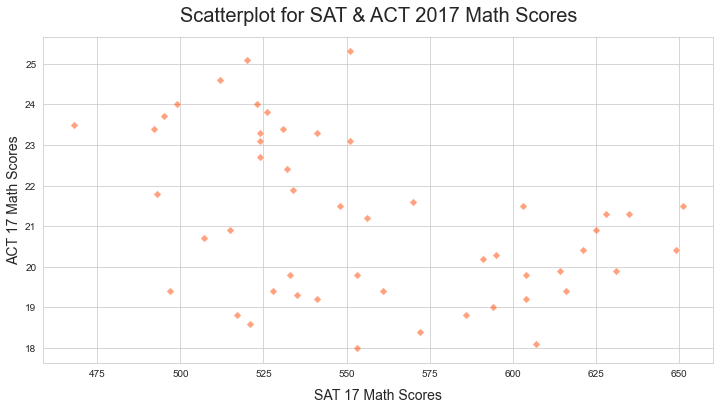

In [107]:
plot_scatterplot(final,'sat17_math','act17_math','Scatterplot for SAT & ACT 2017 Math Scores',['SAT 17 Math Scores','ACT 17 Math Scores'],'orangered')

Per the heatmap correlation, states with a relatively higher ACT mean math score tend to see a relatively lower SAT mean math score and vice versa.

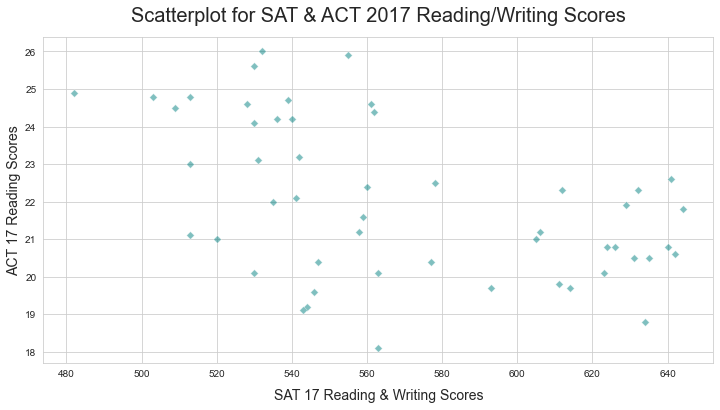

In [108]:
plot_scatterplot(final,'sat17_readingwriting','act17_reading','Scatterplot for SAT & ACT 2017 Reading/Writing Scores',['SAT 17 Reading & Writing Scores','ACT 17 Reading Scores'],'teal')

States with a relatively higher ACT mean Reading score tend to see a relatively lower SAT mean Reading/Writing score and vice versa.

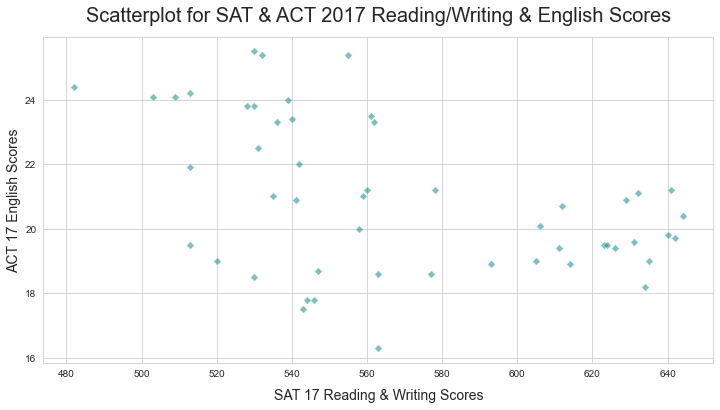

In [109]:
plot_scatterplot(final,'sat17_readingwriting','act17_english','Scatterplot for SAT & ACT 2017 Reading/Writing & English Scores',['SAT 17 Reading & Writing Scores','ACT 17 English Scores'],'teal')

States with a relatively higher ACT mean English score tends to see a relatively lower SAT mean Reading/Writing score and vice versa.

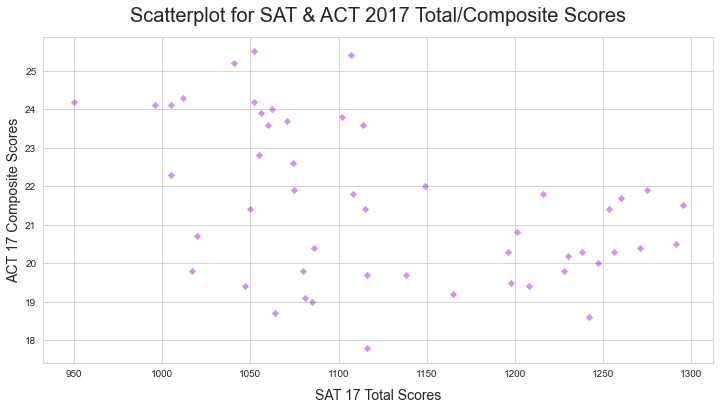

In [110]:
plot_scatterplot(final,'sat17_total','act17_composite','Scatterplot for SAT & ACT 2017 Total/Composite Scores',['SAT 17 Total Scores','ACT 17 Composite Scores'],'darkorchid')

The negative correlation between subject scores is echoed in this scatterplot, which showcases that states with a relatively higher ACT mean composite score tend to see a relatively lower SAT mean total score and vice versa.

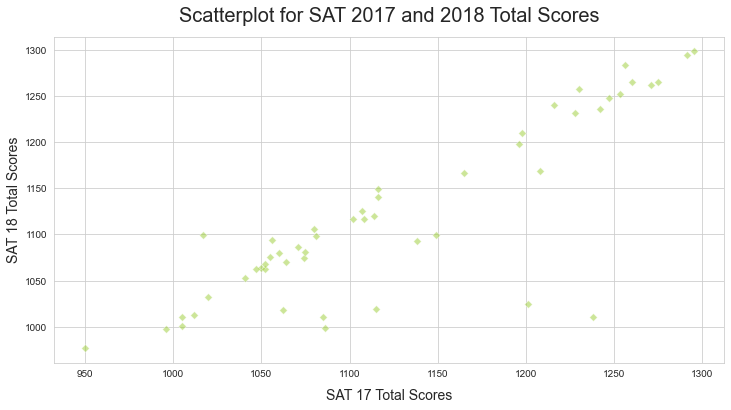

In [111]:
plot_scatterplot(final,'sat17_total','sat18_total','Scatterplot for SAT 2017 and 2018 Total Scores',['SAT 17 Total Scores','SAT 18 Total Scores'],'yellowgreen')

Conversely, we see a strong positive relationship in the scatterplot for SAT scores in 2017 and 2018, where states with a relatively higher SAT mean total score in 2017 have a relatively higher SAT mean total score in 2018.

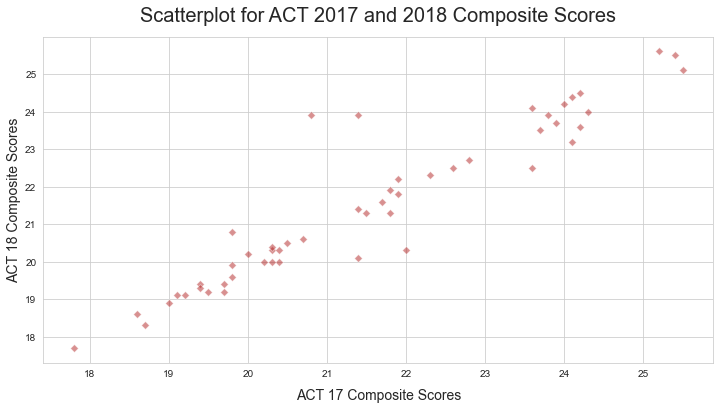

In [112]:
plot_scatterplot(final,'act17_composite','act18_composite','Scatterplot for ACT 2017 and 2018 Composite Scores',['ACT 17 Composite Scores','ACT 18 Composite Scores'],'firebrick')

The same relationship is present for ACT composite scores, and states with a relatively higher ACT mean composite score in 2017 have a relatively higher ACT mean composite score in 2018.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [113]:
final.describe()

,sat17_participation,sat17_readingwriting,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation,sat18_readingwriting,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.457451,563.686275,556.235294,1120.019608,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.373143,47.502627,47.772623,94.155083,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [114]:
def plot_boxplots_h(dataframe,list_of_columns,list_of_labels,title,xlabel,colormap):
    plt.figure(figsize=(12,6))
    plt.title(title,fontsize=20,pad=15)
    plt.xlabel(xlabel,fontsize=14)
    sns.set_style("whitegrid")
    sns.boxplot(data=dataframe[list_of_columns],palette=colormap,orient='h');
    plt.yticks(np.arange(0,len(list_of_columns)),labels=list_of_labels,fontsize=12);
    plt.tick_params(axis='x', pad=10)

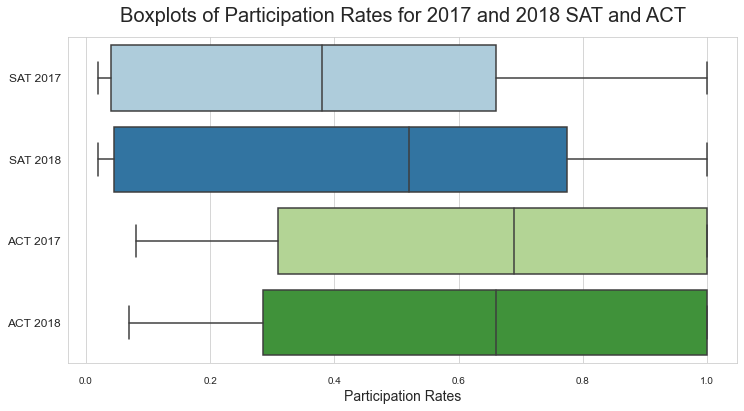

In [115]:
plot_boxplots_h(final,['sat17_participation','sat18_participation','act17_participation','act18_participation'],['SAT 2017','SAT 2018','ACT 2017','ACT 2018'],'Boxplots of Participation Rates for 2017 and 2018 SAT and ACT','Participation Rates','Paired')

Although both tests have states with 100% participation rates in both 2017 and 2018, the ACT test appears to be more popular with more than half of all states having a participation rate of 60% and above. However, we can see a growth in the popularity of the SAT year-on-year as the median SAT participation rate has improved from below 40% to more than 50%.

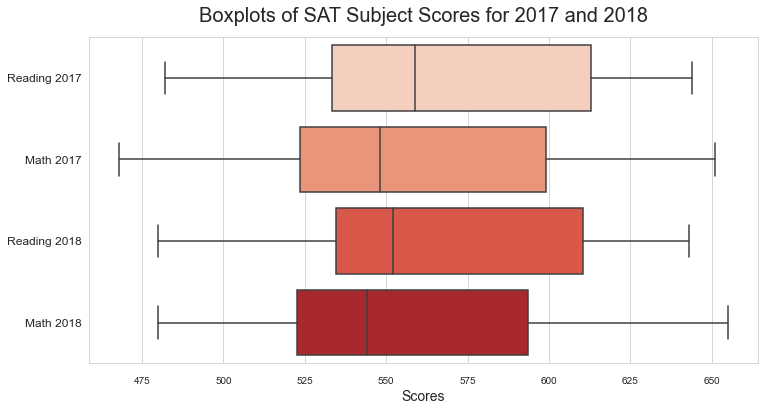

In [116]:
plot_boxplots_h(final,['sat17_readingwriting','sat17_math','sat18_readingwriting','sat18_math'],['Reading 2017','Math 2017','Reading 2018','Math 2018'],'Boxplots of SAT Subject Scores for 2017 and 2018','Scores','Reds')

The mean SAT subject scores appear to be similar year-on-year, where the reading/writing component tends to have a higher median than the math component, but a smaller range within which the values fall.

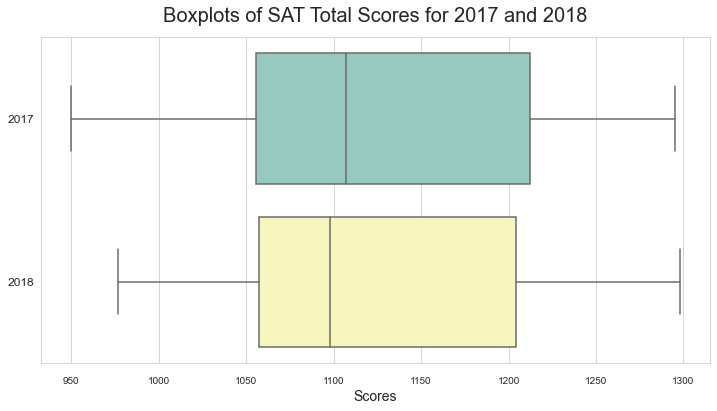

In [117]:
plot_boxplots_h(final,['sat17_total','sat18_total'],['2017','2018'],'Boxplots of SAT Total Scores for 2017 and 2018','Scores','Set3')

The mean SAT total scores have a similar interquartile range and median from 2017 and 2018, but we see an increase in the minimum value in 2018, suggesting that overall performance on the SAT has improved.

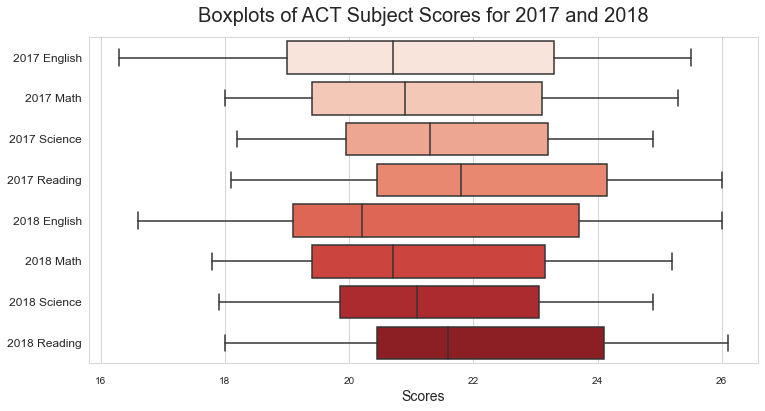

In [118]:
plot_boxplots_h(final,['act17_english','act17_math','act17_science','act17_reading','act18_english','act18_math','act18_science','act18_reading'],['2017 English','2017 Math','2017 Science','2017 Reading','2018 English','2018 Math','2018 Science','2018 Reading'],'Boxplots of ACT Subject Scores for 2017 and 2018','Scores','Reds')

The mean ACT subject scores appear to be similar year-on-year, where the reading component tends to have the highest median and the English component tends to have the lowest median and lowest minimum score of all the subjects.

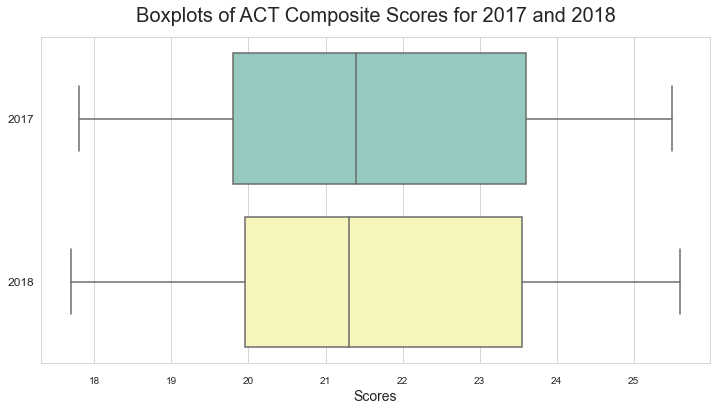

In [119]:
plot_boxplots_h(final,['act17_composite','act18_composite'],['2017','2018'],'Boxplots of ACT Composite Scores for 2017 and 2018','Scores','Set3')

The mean ACT composite scores have a similar interquartile range and median from 2017 and 2018.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

### Defining additional variables

It will be interesting to look at the change in participation rates from 2017 to 2018 for both tests across all states, the average participation rate for each state across both tests as well as changes in mean total/composite scores. Hence, we will define the following variables based on the existing data:
- **sat_part_difference:** SAT participation rate change from 2017 to 2018
- **act_part_difference:** ACT participation rate change from 2017 to 2018
- **average_part17:** Average participation rate across both tests in 2017
- **average_part18:** Average participation rate across both tests in 2018
- **sat_totalchange:** SAT mean total score change from 2017 to 2018
- **act_totalchange:** ACT mean total score change from 2017 to 2018

In [120]:
final['sat_part_difference'] = final['sat18_participation'] - final['sat17_participation']
final['act_part_difference'] = final['act18_participation'] - final['act17_participation']
final['average_part17'] = (final['sat17_participation'] + final['act17_participation']) / 2
final['average_part18'] = (final['sat18_participation'] + final['act18_participation']) / 2
final.head()

,state,sat17_participation,sat17_readingwriting,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,...,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science,sat_part_difference,act_part_difference,average_part17,average_part18
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,1.00,19.1,18.9,18.3,19.6,19.0,0.01,0.00,0.525,0.530
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,0.33,20.8,19.8,20.6,21.6,20.7,0.05,-0.32,0.515,0.380
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,0.66,19.2,18.2,19.4,19.5,19.2,-0.01,0.04,0.460,0.475
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,1.00,19.4,19.1,18.9,19.7,19.4,0.02,0.00,0.515,0.525
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,0.27,22.7,22.5,22.5,23.0,22.1,0.07,-0.04,0.420,0.435


In [121]:
#Check which state had highest average participation rate in 2017.
final.sort_values(by='average_part17',ascending=False).head(10)[['state','sat17_participation','act17_participation','average_part17']]

,state,sat17_participation,act17_participation,average_part17
9,Florida,0.83,0.73,0.780
40,South Carolina,0.50,1.00,0.750
33,North Carolina,0.49,1.00,0.745
11,Hawaii,0.55,0.90,0.725
8,District of Columbia,1.00,0.32,0.660
12,Idaho,0.93,0.38,0.655
6,Connecticut,1.00,0.31,0.655
22,Michigan,1.00,0.29,0.645
28,Nevada,0.26,1.00,0.630
7,Delaware,1.00,0.18,0.590


In [122]:
#Check which state had highest average participation rate in 2018.
final.sort_values(by='average_part18',ascending=False).head(10)[['state','sat18_participation','act18_participation','average_part18']]

,state,sat18_participation,act18_participation,average_part18
40,South Carolina,0.55,1.00,0.775
33,North Carolina,0.52,1.00,0.760
11,Hawaii,0.56,0.89,0.725
13,Illinois,0.99,0.43,0.710
12,Idaho,1.00,0.36,0.680
5,Colorado,1.00,0.30,0.650
6,Connecticut,1.00,0.26,0.630
8,District of Columbia,0.92,0.32,0.620
28,Nevada,0.23,1.00,0.615
10,Georgia,0.70,0.53,0.615


Although Florida had the highest overall participation rate in 2017, this appears to have changed in 2018 and it is not in the top ten states for average participation rate.

In [123]:
#Look at states with lowest participation rates in 2018.
final.sort_values(by="sat18_participation",ascending=True)[['state','sat18_participation','act18_participation','sat_part_difference','act_part_difference','sat18_total']]

,state,sat18_participation,act18_participation,sat_part_difference,act_part_difference,sat18_total
34,North Dakota,0.02,0.98,0.00,0.00,1283
50,Wyoming,0.03,1.00,0.00,0.00,1257
41,South Dakota,0.03,0.77,0.00,-0.03,1240
27,Nebraska,0.03,1.00,0.00,0.16,1252
49,Wisconsin,0.03,1.00,0.00,0.00,1294
24,Mississippi,0.03,1.00,0.01,0.00,1236
15,Iowa,0.03,0.68,0.01,0.01,1265
44,Utah,0.04,1.00,0.01,0.00,1010
23,Minnesota,0.04,0.99,0.01,-0.01,1298
18,Louisiana,0.04,1.00,0.00,0.00,1210


In [124]:
final['sat_totalchange'] = final['sat18_total'] - final['sat17_total']
final['act_totalchange'] = final['act18_composite'] - final['act17_composite']
final.head(10)[['state','sat_totalchange','act_totalchange']]

,state,sat_totalchange,act_totalchange
0,Alabama,1,-0.1
1,Alaska,26,1.0
2,Arizona,33,-0.5
3,Arkansas,-39,0.0
4,California,21,-0.1
5,Colorado,-176,3.1
6,Connecticut,12,0.4
7,Delaware,2,-0.9
8,District of Columbia,27,-0.6
9,Florida,82,0.1


In [125]:
#Look at states with the highest difference in SAT participation from 2017 to 2018.
final.sort_values(by="sat_part_difference",ascending=False)[['state','sat17_participation','sat18_participation','act17_participation','act18_participation','sat_part_difference','act_part_difference']].head(10)

,state,sat17_participation,sat18_participation,act17_participation,act18_participation,sat_part_difference,act_part_difference
13,Illinois,0.09,0.99,0.93,0.43,0.90,-0.50
5,Colorado,0.11,1.00,1.00,0.30,0.89,-0.70
39,Rhode Island,0.71,0.97,0.21,0.15,0.26,-0.06
48,West Virginia,0.14,0.28,0.69,0.65,0.14,-0.04
30,New Jersey,0.70,0.82,0.34,0.31,0.12,-0.03
32,New York,0.67,0.79,0.31,0.27,0.12,-0.04
10,Georgia,0.61,0.70,0.55,0.53,0.09,-0.02
20,Maryland,0.69,0.76,0.28,0.31,0.07,0.03
12,Idaho,0.93,1.00,0.38,0.36,0.07,-0.02
4,California,0.53,0.60,0.31,0.27,0.07,-0.04


In [126]:
#Look at states with the highest difference in ACT participation from 2017 to 2018.
final.sort_values(by="act_part_difference",ascending=True)[['state','sat17_participation','sat18_participation','act17_participation','act18_participation','sat_part_difference','act_part_difference']].head(10)

,state,sat17_participation,sat18_participation,act17_participation,act18_participation,sat_part_difference,act_part_difference
5,Colorado,0.11,1.00,1.00,0.30,0.89,-0.70
13,Illinois,0.09,0.99,0.93,0.43,0.90,-0.50
1,Alaska,0.38,0.43,0.65,0.33,0.05,-0.32
22,Michigan,1.00,1.00,0.29,0.22,0.00,-0.07
9,Florida,0.83,0.56,0.73,0.66,-0.27,-0.07
39,Rhode Island,0.71,0.97,0.21,0.15,0.26,-0.06
47,Washington,0.64,0.69,0.29,0.24,0.05,-0.05
45,Vermont,0.60,0.64,0.29,0.24,0.04,-0.05
6,Connecticut,1.00,1.00,0.31,0.26,0.00,-0.05
46,Virginia,0.65,0.68,0.29,0.24,0.03,-0.05


In [127]:
#States with positive participation rate change in both tests.
final.loc[(final['sat_part_difference'] > 0) & (final['act_part_difference'] > 0),['state','sat17_participation','sat18_participation','act17_participation','act18_participation','sat_part_difference','act_part_difference']]

,state,sat17_participation,sat18_participation,act17_participation,act18_participation,sat_part_difference,act_part_difference
15,Iowa,0.02,0.03,0.67,0.68,0.01,0.01
20,Maryland,0.69,0.76,0.28,0.31,0.07,0.03
31,New Mexico,0.11,0.16,0.66,0.67,0.05,0.01
35,Ohio,0.12,0.18,0.75,1.00,0.06,0.25
37,Oregon,0.43,0.48,0.40,0.42,0.05,0.02


In [128]:
#States with negative participation rate change in both tests.
final.loc[(final['sat_part_difference'] < 0) & (final['act_part_difference'] < 0),['state','sat17_participation','sat18_participation','act17_participation','act18_participation','sat_part_difference','act_part_difference']]

,state,sat17_participation,sat18_participation,act17_participation,act18_participation,sat_part_difference,act_part_difference
9,Florida,0.83,0.56,0.73,0.66,-0.27,-0.07


#### Change in Participation Rates

The states with the biggest positive change for SAT participation rates were Illinois and Colorado, which both recorded increases of approximately 90 percentage points. The two states also recorded the largest decreases in ACT participation rates.

Of states that saw increases in participation rates for both tests, Ohio saw the largest overall participation rate increase at +6% for the SAT and +25% for the ACT.

Interestingly, Florida's participation rates in both tests decreased from 2017 to 2018.



In [129]:
#States with the highest positive difference in SAT participation rates.
final.loc[final['sat_part_difference'] > 0.5,:][['state','sat17_participation','act17_participation','sat18_participation','act18_participation','sat_part_difference','act_part_difference']]


,state,sat17_participation,act17_participation,sat18_participation,act18_participation,sat_part_difference,act_part_difference
5,Colorado,0.11,1.00,1.00,0.30,0.89,-0.7
13,Illinois,0.09,0.93,0.99,0.43,0.90,-0.5


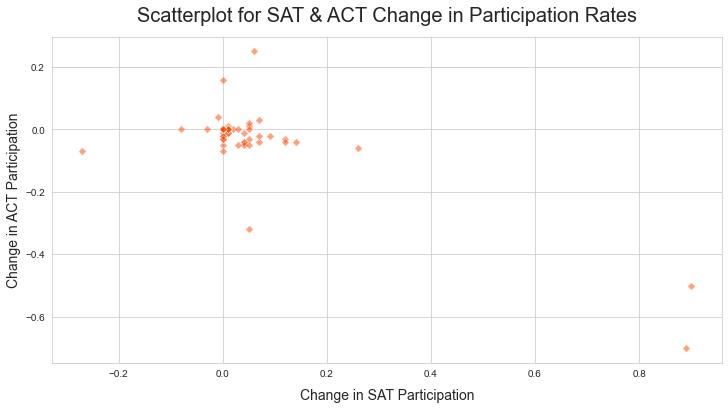

In [130]:
plot_scatterplot(final,'sat_part_difference','act_part_difference','Scatterplot for SAT & ACT Change in Participation Rates',['Change in SAT Participation','Change in ACT Participation'],'orangered')

Most states did not see a significantly large change in participation rates, as we can see most of the data points fall within the +/-0.2 range on both x and y axes. It appears that the SAT saw more states with an increase in participation rates, although the increase was generally quite small.

The two outlying points in the right bottom corner of the plot are Illinois and Colorado, who saw the highest positive growth in SAT participation rates.

In [131]:
final.sort_values(by='sat_totalchange',ascending=True)[['state','sat17_total','sat18_total','sat_totalchange','act_totalchange','sat_part_difference']].head()

,state,sat17_total,sat18_total,sat_totalchange,act_totalchange,sat_part_difference
44,Utah,1238,1010,-228,0.1,0.01
5,Colorado,1201,1025,-176,3.1,0.89
13,Illinois,1115,1019,-96,2.5,0.90
48,West Virginia,1086,999,-87,-0.1,0.14
11,Hawaii,1085,1010,-75,-0.1,0.01


In [132]:
final.sort_values(by='sat_totalchange',ascending=False)[['state','sat17_total','sat18_total','sat_totalchange','act_totalchange','sat_part_difference']].head()

,state,sat17_total,sat18_total,sat_totalchange,act_totalchange,sat_part_difference
9,Florida,1017,1099,82,0.1,-0.27
30,New Jersey,1056,1094,38,-0.2,0.12
2,Arizona,1116,1149,33,-0.5,-0.01
50,Wyoming,1230,1257,27,-0.2,0.00
34,North Dakota,1256,1283,27,0.0,0.00


In [133]:
final.loc[final['act_totalchange'] > 0,['state','sat17_total','sat18_total','sat_totalchange','act_totalchange','act_part_difference']].sort_values(by='act_totalchange',ascending=False)

,state,sat17_total,sat18_total,sat_totalchange,act_totalchange,act_part_difference
5,Colorado,1201,1025,-176,3.1,-0.70
13,Illinois,1115,1019,-96,2.5,-0.50
1,Alaska,1080,1106,26,1.0,-0.32
45,Vermont,1114,1120,6,0.5,-0.05
6,Connecticut,1041,1053,12,0.4,-0.05
32,New York,1052,1068,16,0.3,-0.04
47,Washington,1075,1081,6,0.3,-0.05
22,Michigan,1005,1011,6,0.3,-0.07
17,Kentucky,1247,1248,1,0.2,0.00
39,Rhode Island,1062,1018,-44,0.2,-0.06


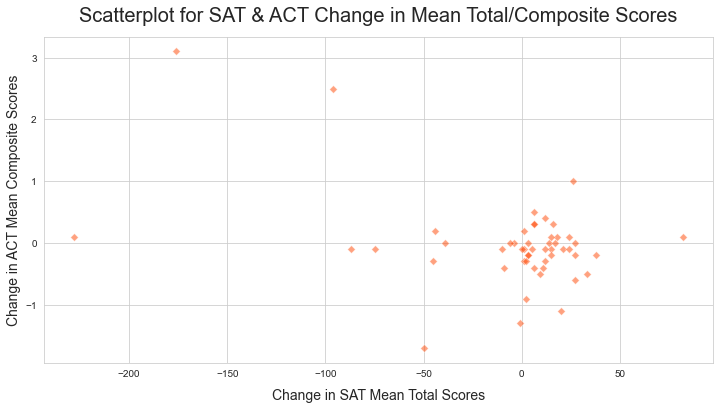

In [134]:
plot_scatterplot(final,'sat_totalchange','act_totalchange','Scatterplot for SAT & ACT Change in Mean Total/Composite Scores',['Change in SAT Mean Total Scores','Change in ACT Mean Composite Scores'],'orangered')

The majority of states did not see a significant change in mean total/composite scores, with most data points falling within (-100, 50) for SAT scores and (-2, 1) for ACT scores. The exceptions are Illinois and Colorado, which saw their mean totals for the ACT increase significantly with the fall in ACT participation rates. We see a corresponding decrease in SAT mean total scores as well.

Additionally, two states saw significant changes in SAT mean scores without a clear change in ACT scores. Florida's mean SAT total score increased with a drop in participation rate, while Utah's mean score fell significantly with only a 1% increase in participation.

## Updated Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT & SAT|The U.S. state for which the data applies.|
|sat17_participation|float|SAT 2017|The state's participation rate for the 2017 SAT.|
|sat17_readingwriting|int|SAT 2017|The state's mean score for the Evidence-Based Reading & Writing component of the 2017 SAT.|
|sat17_math|int|SAT 2017|The state's mean score for the Math component of the 2017 SAT.|
|sat17_total|int|SAT 2017|The state's mean total score for the 2017 SAT.|
|act17_participation|float|ACT 2017|The state's participation rate for the 2017 ACT.|
|act17_english|float|ACT 2017|The state's mean score for the English component of the 2017 ACT.|
|act17_math|float|ACT 2017|The state's mean score for the Math component of the 2017 ACT.|
|act17_reading|float|ACT 2017|The state's mean score for the Reading component of the 2017 ACT.|
|act17_science|float|ACT 2017|The state's mean score for the Science component of the 2017 ACT.|
|act17_composite|float|ACT 2017|The state's mean composite score for the 2017 ACT.|
|sat18_participation|float|SAT 2018|The state's participation rate for the 2018 SAT.|
|sat18_readingwriting|int|SAT 2018|The state's mean score for the Evidence-Based Reading & Writing component of the 2018 SAT.|
|sat18_math|int|SAT 2018|The state's mean score for the Math component of the 2018 SAT.|
|sat18_total|int|SAT 2018|The state's mean total score for the 2018 SAT.|
|act18_participation|float|ACT 2018|The state's participation rate for the 2018 ACT.|
|act18_english|float|ACT 2018|The state's mean score for the English component of the 2018 ACT.|
|act18_math|float|ACT 2018|The state's mean score for the Math component of the 2018 ACT.|
|act18_reading|float|ACT 2018|The state's mean score for the Reading component of the 2018 ACT.|
|act18_science|float|ACT 2018|The state's mean score for the Science component of the 2018 ACT.|
|act18_composite|float|ACT 2018|The state's mean composite score for the 2018 ACT.|
|sat_part_difference|float|Final Dataset|The state's SAT participation rate change from 2017 to 2018.|
|act_part_difference|float|Final Dataset|The state's ACT participation rate change from 2017 to 2018.|
|average_part17|float|Final Dataset|The state's average participation rate across both tests in 2017.|
|average_part18|float|Final Dataset|The state's average participation rate across both tests in 2018.|
|sat_totalchange|int|Final Dataset|The state's SAT mean total score change from 2017 to 2018.|
|act_totalchange|float|Final Dataset|The state's ACT mean total score change from 2017 to 2018.|

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [135]:
#N/A

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [136]:
#Look at relevant statistics for the table of variables.
round(final.describe().transpose(),2)[['mean','std','min','50%','max']]

,mean,std,min,50%,max
sat17_participation,0.40,0.35,0.02,0.38,1.00
sat17_readingwriting,569.12,45.67,482.00,559.00,644.00
sat17_math,556.88,47.12,468.00,548.00,651.00
sat17_total,1126.10,92.49,950.00,1107.00,1295.00
act17_participation,0.65,0.32,0.08,0.69,1.00
act17_english,20.93,2.35,16.30,20.70,25.50
act17_math,21.18,1.98,18.00,20.90,25.30
act17_reading,22.01,2.07,18.10,21.80,26.00
act17_science,21.45,1.74,18.20,21.30,24.90
act17_composite,21.52,2.02,17.80,21.40,25.50


|Variable|Values Range|Mean|Median|Distribution|
|---|---|---|---|---|
|**sat17_participation**|0.02-1.00|0.40|0.38|The distribution is right-skewed with the majority of values occuring in the lower value cells.|
|**sat17_readingwriting**|482-644|569.12|559.00|The distribution is bimodal with the highest peak occurring around 540 and another peak around the upper edge of 640.|
|**sat17_math**|468-651|556.88|548.00|The distribution is bimodal with the highest peak occurring around 530 and another peak before the edge, around 620.|
|**sat17_total**|950-1295|1126.10|1107.00|The distribution is bimodal with the highest peak occurring around 1025 and another peak before the edge, around 1225.|
|**act17_participation**|0.08-1.00|0.65|0.69|The distribution is bimodal with the highest peak occurring at the right edge of 1.0 and another peak around 0.3.|
|**act17_english**|16.30-25.50|20.93|20.70|The distribution is trimodal with the two highest peaks occurring around 19.0 and 21.0 and another smaller peak around 24.|
|**act17_math**|18.00-25.30|21.18|20.90|The distribution is trimodal with the highest peak occurring around 19.0 and two smaller peaks around 21.0 and 23.5.|
|**act17_reading**|18.10-26.00|22.01|21.80|The distribution is trimodal with the two highest peaks occurring around 20.5 and 24.5, and a smaller peak around 22.5.|
|**act17_science**|18.20-24.90|21.45|21.30|The distribution is trimodal with the highest peak occurring around 22.0 and smaller peaks at around 19.5 and 23.5|
|**act17_composite**|17.80-25.50|21.52|21.40|The distribution is trimodal with the highest peak occurring around 20.0 and smaller peaks at around 22.0 and 24.5|
|**sat18_participation**|0.02-1.00|0.46|0.52|The distribution is right-skewed with the majority of values occuring in the lower value cells.|
|**sat18_readingwriting**|480-643|563.69|552.00|The distribution is bimodal with the highest peak occurring around 630 and another peak around 550.|
|**sat18_math**|480-655|556.24|544.00|The distribution is bimodal with the highest peak occurring around 530 and another peak around 630.|
|**sat18_total**|977-1298|1120.02|1098.00|The distribution is trimodal with peaks in value around 1020, 1070 and 1250.|
|**act18_participation**|0.07-1.00|0.62|0.66|The distribution is left-skewed with the majority of values occurring at the right edge of the histogram.|
|**act18_composite**|17.70-25.60|21.49|21.30|The distribution is bimodal with the highest peak occurring around 20.5 and a smaller peak at around 23.5|
|**act18_english**|16.60-26.00|20.99|20.20|The distribution is bimodal with the two peaks occurring around 19.5 and 24.|
|**act18_math**|17.80-25.20|21.13|20.70|The distribution is bimodal with the highest peak occurring around 19.75 and a smaller peak around 23.5.|
|**act18_reading**|18.00-26.10|22.02|21.60|The distribution is bimodal with the highest peak occurring around 21.0 and a smaller peak around 25.0.|
|**act18_science**|17.90-24.90|21.35|21.10|The distribution is trimodal with the highest peak occurring around 22.0 and smaller peaks at around 20.2 and 23.5|
|**act18_science**|17.90-24.90|21.35|21.10|The distribution is trimodal with the highest peak occurring around 22.0 and smaller peaks at around 20.2 and 23.5|



#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: 

We don't see this trend for the data for the SAT and ACT tests. When we look at the histograms of each numeric variable, the data does not appear to be bell-shaped and distributed around the mean. This is likely due to the fact that our samples are by state and each state's educational policies would affect the participation rates and scores. The samples are not taken randomly. 

Additionally, the size of the student population in each state is also different and the sample sizes are not the same.


Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer:**

**Math** - CLT will not hold true as each state's data is not a random sample and the sample sizes are different from one another. While the data gives us an idea of student performance in each state, we are not able to draw inferences for the national population. 

**Reading** - CLT will not hold true as each state's data is not a random sample and the sample sizes are different from one another. While the data gives us an idea of student performance in each state, we are not able to draw inferences for the national population.

**Rates** - We would not apply CLT to this metric as the participation rates are calculated by dividing total students taking the tests in each state across the population of students in each state. As the sample sizes vary, the rates will not be useful for drawing any inferences nationally.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: No, it does not as our samples are not taken randomly and the data is put together as an aggregate across the entire state. Each state's participation rate indicates the true mean of the state's participation and we cannot use that to make inferences for a national population. 

Additionally, the size of each state would affect the participation rate as two states with the same participation rate may have different total number of participants. Without the actual numbers for each state's student population, we are not able to inference participation rates on a national level.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer: From the plots, we can see that the SAT and ACT participation rates and scores tend to be negatively correlated. It would make sense that students that are studying for the SAT test may not study specifically for the ACT test and vice versa, hence we cannot compare the results across both tests.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [137]:
#N/A

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**Background Context**

The SAT and ACT are competitors as standardised tests in the United States, where SAT and ACT scores are often a component of college applications for high school seniors. Hence, many high school students choose to take either the SAT, ACT or both in their junior year.

Additionally, these tests are state-administered in several states, which can be defined as:

> [(They) are paid-for and administered by the respective State Boards of Education, and the results are used to determine statewide scholastic achievement.](https://www.testive.com/state-sat-act/) (Testive.com)

Although the SAT was initially more popular than the ACT, [the ACT overtook the SAT in 2012](https://www.washingtonpost.com/blogs/answer-sheet/post/how-act-overtook-sat-as-the-top-college-entrance-exam/2012/09/24/d56df11c-0674-11e2-afff-d6c7f20a83bf_blog.html) (The Washington Post, 2012), with more students opting for it. Because of this, increased efforts were put toward encouraging participation in the SAT, including an [overhaul of the testing standards to convince states to move toward using the SAT as their statewide accountability test](https://www.newamerica.org/education-policy/edcentral/how-college-boards-aggressive-campaign-to-save-the-sat-may-kill-it/) (New America, 2019).

**States of Interest**

Three states of note are Illinois, Colorado and Ohio.

*Illinois & Colorado*

These two states saw a very large increase in SAT participation rates and a corresponding decrease in ACT participation rates. This is due to College Board's partnership with both [Illinois](https://www.testive.com/illinois/) and [Colorado](https://www.testive.com/colorado-sat-change-2017/) (Testive.com) to administer the SAT as the state’s accountability exam. 

Before this, the ACT held [the statewide contract for these two states](https://www.edweek.org/ew/articles/2018/10/17/math-scores-slide-to-a-20-year-low.html) (Edweek, 2018), which explains the high ACT participation rates in 2017. With each state covering the cost of the SAT and making it mandatory for high school juniors, the increase in participation and corresponding decrease is natural.

*Ohio*

Ohio saw an increase in participation rates across both tests, particularly for the ACT, where participation rate increased to 100%. This is due to a similar partnership where [the state paid for all students in the Class of 2018 to take the exam](https://www.daytondailynews.com/news/historically-low-act-scores-red-flag-for-our-country/djfx9Urp719WyEaMfykyxL/) (Dayton Daily News, 2018).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

*Key Takeaways & Recommendations*

From the data, the states with highest growth in SAT participation rates had extremely high participation rates in the ACT in 2017. The states with the most potential for growth in participation rates are states who already mandate the ACT test, and hence the College Board should work on lobbying these states to switch to the SAT as their state accountability test. We should also consider the existing SAT participation rate as the two states Illinois and Colorado had SAT participation rates of around 10% in 2017, indicating that the SAT already had some traction in those states. 

A good example of this would be Ohio, which has a SAT participation rate of 16% in 2018 and has a 100% participation rate in the ACT. It is [one of the states that administers the ACT state-wide](https://www.testive.com/state-sat-act/). The population size is also [relatively large at 11.6M and it is the 7th most populous state in the United States](https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx?#).
The College Board should consider working with the state education board of Ohio and lobby them to switch to the SAT as their state accountability exam.

Depending on the state's contract with ACT, it may take a few years for lobbying efforts to see fruition, and in the short-term, the College Board can also consider approaching states that do not have a contract with either SAT or ACT, as they would be able to implement it quicker. One good candidate would be California, the most populous state in the United States with a population of 39M. It already has a relatively high participation rate in the SAT of 60%, indicating that there would be enough traction in the state for the test.


*Additional Data*

Additional data that would have been useful for this analysis are the following:
- Categorical variable on state policies toward standardized testing (e.g. Mandates testing: Yes/No; which state-administered test if any)
- Data from preceding and subsequent years such that we could examine a trend in the data over time.
- More granular data at the county or school-level that would have allowed us more data points to examine the trends in test scores and participation rates.
